In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Nadam, Adamax, Adagrad, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint



In [2]:
import os
base_dir ="C:/Users/chundie/Desktop/OriginalDataset"
img_size = (224, 224)

In [3]:
x=[]
y=[]

In [4]:
from tensorflow.keras.utils import load_img, img_to_array
for label in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            try:
                # Chargement de l'image et redimensionnement
                img = load_img(file_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0  # Normalisation
                x.append(img_array)
                y.append(label)  # Nom du dossier = classe
            except Exception as e:
                print(f"Erreur avec {file_path} : {e}")

In [5]:
# Conversion en numpy array
x = np.array(x, dtype="float32")
y = np.array(y)

In [6]:
# Encodage des labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [7]:
x.shape

(6400, 224, 224, 3)

In [8]:
y.shape

(6400,)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=42)


In [10]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [11]:
y_train

array([3, 3, 2, ..., 3, 3, 0], shape=(5440,))

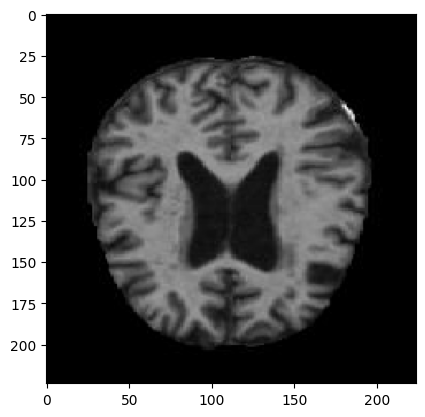

In [12]:
import matplotlib.pyplot as plt
for i in range(0,3):
    plt.imshow(x_test[i],cmap='grey')
    plt.show

In [13]:
x_train=np.expand_dims(x_train,axis=3)
x_test=np.expand_dims(x_test,axis=3)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)


(5440, 224, 224, 1, 3)
(960, 224, 224, 1, 3)
(5440,)


In [15]:
# Normalisation:
train_images = x_train.astype("float32") / 255
test_images = x_test.astype("float32") / 255


In [16]:
x_train=np.squeeze(x_train)
x_test=np.squeeze(x_test)
print(x_train.shape)
print(x_test.shape)

(5440, 224, 224, 3)
(960, 224, 224, 3)


In [17]:
from tensorflow.keras.regularizers import l1
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu',
           kernel_regularizer=l1(0.01), input_shape=(224, 224, 3)),

    MaxPooling2D(pool_size=(3, 3), strides=(1, 1)),

    Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 2), activation='relu', padding='same'),

    Flatten(),

    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(300, activation='relu'),
    Dropout(0.3),
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),

    Dense(10, activation='softmax')
])

model.summary()

c:\Users\chundie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 111, 111, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 55, 55, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 55, 55, 64)     │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 193600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    19,360,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,742,410 (75.31 MB)

 Trainable params: 19,742,410 (75.31 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
sgd = tf.keras.optimizers.SGD(0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
nadam = tf.keras.optimizers.Nadam()
adamax = tf.keras.optimizers.Adamax()
adagrad = tf.keras.optimizers.Adagrad()
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


In [19]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [20]:
model.compile(
    optimizer=adam,
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [22]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [23]:
print(type(y_train))
print(y_train.dtype)
print(y_train[:5])

<class 'numpy.ndarray'>
int64
[3 3 2 2 2]


In [24]:
print(type(x_train))
print(type(x_train[0]))
print(x_train[0].shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(224, 224, 3)


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

checkpoint_path = 'C:/Users/chundie/Desktop/pfa fatima/best_model.h5'

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)

history = model.fit(x_train, y_train, epochs=50,batch_size=100, validation_split=0.2,callbacks=[ checkpoint,reduce_lr,early_stopping ])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4591 - loss: 2.4439
Epoch 1: val_accuracy improved from None to 0.50368, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 297s 7s/step - accuracy: 0.4688 - loss: 2.0691 - val_accuracy: 0.5037 - val_loss: 1.5953 - learning_rate: 0.0010
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4793 - loss: 1.5324
Epoch 2: val_accuracy did not improve from 0.50368
44/44 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.4743 - loss: 1.4639 - val_accuracy: 0.5037 - val_loss: 1.2954 - learning_rate: 0.0010
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5012 - loss: 1.2658
Epoch 3: val_accuracy improved from 0.50368 to 0.52298, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.4982 - loss: 1.2292 - val_accuracy: 0.5230 - val_loss: 1.1008 - learning_rate: 0.0010
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5247 - loss: 1.1035
Epoch 4: val_accuracy improved from 0.52298 to 0.58548, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5349 - loss: 1.0611 - val_accuracy: 0.5855 - val_loss: 0.9413 - learning_rate: 0.0010
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5562 - loss: 0.9804
Epoch 5: val_accuracy did not improve from 0.58548
44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5659 - loss: 0.9606 - val_accuracy: 0.5708 - val_loss: 0.8947 - learning_rate: 0.0010
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5946 - loss: 0.8750
Epoch 6: val_accuracy improved from 0.58548 to 0.61213, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6119 - loss: 0.8560 - val_accuracy: 0.6121 - val_loss: 0.7929 - learning_rate: 0.0010
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6425 - loss: 0.7912
Epoch 7: val_accuracy improved from 0.61213 to 0.72243, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6542 - loss: 0.7677 - val_accuracy: 0.7224 - val_loss: 0.6583 - learning_rate: 0.0010
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7046 - loss: 0.6451
Epoch 8: val_accuracy improved from 0.72243 to 0.78309, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7185 - loss: 0.6337 - val_accuracy: 0.7831 - val_loss: 0.5372 - learning_rate: 0.0010
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7889 - loss: 0.5074
Epoch 9: val_accuracy improved from 0.78309 to 0.81893, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7934 - loss: 0.4937 - val_accuracy: 0.8189 - val_loss: 0.4807 - learning_rate: 0.0010
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8329 - loss: 0.4176
Epoch 10: val_accuracy improved from 0.81893 to 0.85938, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8355 - loss: 0.4031 - val_accuracy: 0.8594 - val_loss: 0.3625 - learning_rate: 0.0010
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8914 - loss: 0.2965
Epoch 11: val_accuracy improved from 0.85938 to 0.90809, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 373s 9s/step - accuracy: 0.8892 - loss: 0.2927 - val_accuracy: 0.9081 - val_loss: 0.2705 - learning_rate: 0.0010
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9230 - loss: 0.2199
Epoch 12: val_accuracy improved from 0.90809 to 0.91728, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9191 - loss: 0.2275 - val_accuracy: 0.9173 - val_loss: 0.2314 - learning_rate: 0.0010
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9328 - loss: 0.1835
Epoch 13: val_accuracy improved from 0.91728 to 0.92831, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9308 - loss: 0.1871 - val_accuracy: 0.9283 - val_loss: 0.2713 - learning_rate: 0.0010
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9410 - loss: 0.1783
Epoch 14: val_accuracy improved from 0.92831 to 0.95588, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9478 - loss: 0.1670 - val_accuracy: 0.9559 - val_loss: 0.1728 - learning_rate: 0.0010
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9536 - loss: 0.1454
Epoch 15: val_accuracy improved from 0.95588 to 0.95956, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9563 - loss: 0.1394 - val_accuracy: 0.9596 - val_loss: 0.1629 - learning_rate: 0.0010
Epoch 16/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9582 - loss: 0.1422
Epoch 16: val_accuracy did not improve from 0.95956
44/44 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - accuracy: 0.9589 - loss: 0.1356 - val_accuracy: 0.9577 - val_loss: 0.1800 - learning_rate: 0.0010
Epoch 17/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9583 - loss: 0.1369
Epoch 17: val_accuracy did not improve from 0.95956
44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9607 - loss: 0.1295 - val_accuracy: 0.9494 - val_loss: 0.1994 - learning_rate: 0.0010
Epoch 18/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9711 - loss: 0.0995
Epoch 18: val_accuracy improved from 0.95956 to 0.96783, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9706 - loss: 0.0988 - val_accuracy: 0.9678 - val_loss: 0.1316 - learning_rate: 0.0010
Epoch 19/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9600 - loss: 0.1302
Epoch 19: val_accuracy did not improve from 0.96783
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9619 - loss: 0.1230 - val_accuracy: 0.9632 - val_loss: 0.1491 - learning_rate: 0.0010
Epoch 20/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9752 - loss: 0.0884
Epoch 20: val_accuracy did not improve from 0.96783
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9750 - loss: 0.0898 - val_accuracy: 0.9623 - val_loss: 0.1753 - learning_rate: 0.0010
Epoch 21/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9756 - loss: 0.0866
Epoch 21: val_accuracy did not improve from 0.96783
44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9768 - loss: 0.0846 - val_accuracy: 0.9366 - val_loss: 0.2678 - learning_rate: 0.0010
Epoch 22/50
44/44 ━━━━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9697 - loss: 0.1012 - val_accuracy: 0.9697 - val_loss: 0.1300 - learning_rate: 0.0010
Epoch 23/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9847 - loss: 0.0695
Epoch 23: val_accuracy did not improve from 0.96967
44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9812 - loss: 0.0730 - val_accuracy: 0.9559 - val_loss: 0.1844 - learning_rate: 0.0010
Epoch 24/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9752 - loss: 0.0854
Epoch 24: val_accuracy did not improve from 0.96967
44/44 ━━━━━━━━━━━━━━━━━━━━ 293s 7s/step - accuracy: 0.9756 - loss: 0.0870 - val_accuracy: 0.9605 - val_loss: 0.1629 - learning_rate: 0.0010
Epoch 25/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9742 - loss: 0.0813
Epoch 25: val_accuracy did not improve from 0.96967
44/44 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9775 - loss: 0.0773 - val_accuracy: 0.9568 - val_loss: 0.1869 - learning_rate: 0.0010
Epoch 26/50
44/44 ━━━━━━━━━━━━━━━━━

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy sur l’ensemble de test :", test_acc)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9698 - loss: 0.1195
Accuracy sur l’ensemble de test : 0.9697916507720947


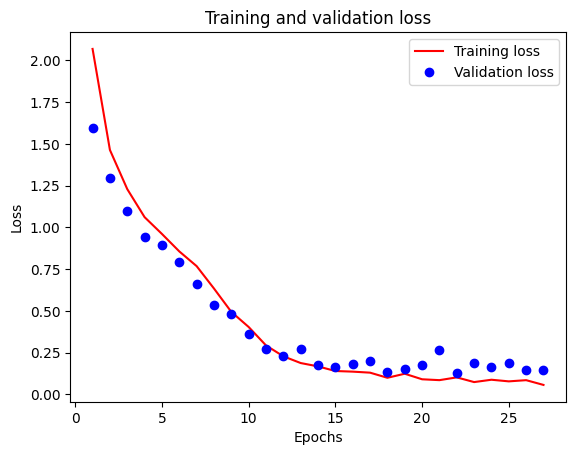

In [27]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "bo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

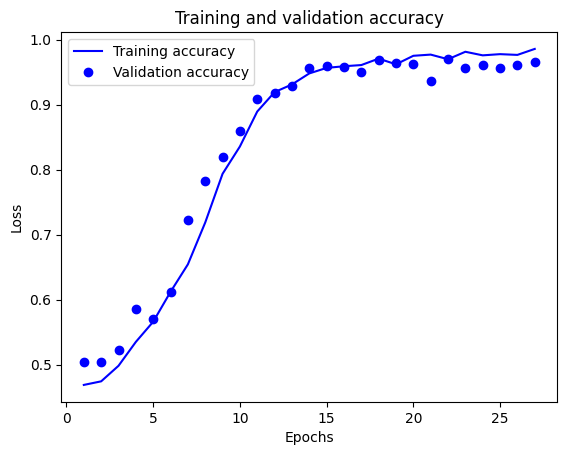

In [28]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training accuracy")
plt.plot(epochs, val_loss_values, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()